In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.datasets import fetch_mldata

import warnings
warnings.filterwarnings("ignore")

In [264]:
mnist = pd.read_csv('mnist_train.csv')

In [265]:
mnist.rename({'5':'label'},axis=1,inplace=True)
# mnist.head(10)

In [266]:
y = mnist['label']
x = mnist.drop('label', axis=1)

In [2]:
def find_most_uncertain(model, X, n):
    probs = model.predict_proba(X)
    prob_maxs = []
    for i in range(0,len(probs)):
        prob_maxs.append((i,max(probs[i])))
    
    prob_maxs.sort(key = lambda x: x[1])
    return [x[0] for x in prob_maxs[:n]]

def sample_df_updates(X,y,n_sample):
    sample_indices = np.random.choice(len(X),n_sample, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]
    X.drop(X.index[sample_indices],inplace=True)
    y.drop(y.index[sample_indices],inplace=True)

    return X_sample, y_sample, X, y


def sample_from_uncertain(X,y,n_sample,model):
    sample_indices = find_most_uncertain(model, X, n_sample)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]
    X.drop(X.index[sample_indices],inplace=True)
    y.drop(y.index[sample_indices],inplace=True)

    return X_sample, y_sample, X, y

In [3]:
def mlp_active_random(X,y,n_start,n_step,n_test):
    X_test,y_test,X,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=(300,300))
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    searching = True
    
    while searching == True:
        mlp = MLPClassifier(hidden_layer_sizes=(300,300),warm_start=True)
        X_temp, y_temp, X, y = sample_df_updates(X,y,n_step)
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        if accuracy > .95:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)
    return sample_count_list, accuracies

Final samples : 14500
Final accuracy : 0.95125


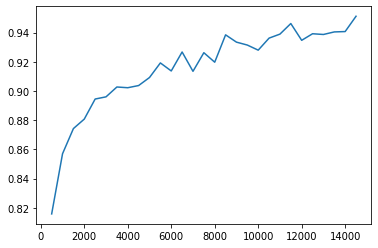

In [297]:
mlp_active_random(x,y,500,500,4000)

In [4]:
def mlp_active_probability(X,y,n_start,n_step,n_test):
    X_test,y_test,X,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=(300,300))
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    
    searching = True
    
    while searching == True:
        X_temp, y_temp, X, y = sample_from_uncertain(X,y,n_step,mlp)
        
        mlp = MLPClassifier(hidden_layer_sizes=(300,300),warm_start=True)
        
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        if accuracy >.95:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)
    return sample_count_list, accuracies

In [374]:
mnist = pd.read_csv('mnist_train.csv')
mnist.rename({'5':'label'},axis=1,inplace=True)
y = mnist['label']
x = mnist.drop('label', axis=1)

Final samples : 9500
Final accuracy : 0.956


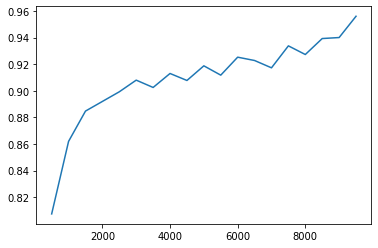

In [281]:
mlp_active_probability(x,y,500,500,4000)

In [5]:
def euclidian_distance(array_1,array_2):
    dist = 0
    for n in range(0,len(array_1)):
        dist += (array_1[n] - array_2[n])**2
    return dist

In [302]:
y_pred_test = mlp.predict(x[:100])

In [307]:
x[:100][y_pred_test == 0 ]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
x[:100][y_pred_test == 1]
for n in range(0,len(x[:100][y_pred_test == 1])):
    print(euclidian_distance(x.iloc[0],x[:100][y_pred_test == 1].iloc[n]))

7653668
7388793
7559415
7505612
7195240
7290739
7231095
7819459
7965476
7263045
7093141
7238579
7246510
7531690
7352232
7477842
7091066
7333682
6026214
7628944
7309889


In [6]:
def distance_to_closest_neighbor(point, df):
    dists = []
    for n in range(0,len(df)):
        dists.append(euclidian_distance(point,df.iloc[n]))
    return min(dists)

In [332]:
distance_to_closest_neighbor(x.iloc[0], x[:100][y_pred_test != 0])

5436361

In [7]:
def assemble_min_distances(X, y_pred, n_to_return):
    min_dists = []
    for n in range(0,len(X)):
        point = X.iloc[n]
        df = X[y_pred != y_pred[n]]
        min_dists.append((n,distance_to_closest_neighbor(point, df)))
    min_dists.sort(key = lambda x: x[1])
    return [x[0] for x in min_dists[:n_to_return]]

This takes way too long to go through long arrays. It really ought to be vectorized. Below follows a demonstration of how the time savings through a simple vectorization through numpy:

In [9]:
import time
# start_time = time.time()
# assemble_min_distances(x[:20], y_pred_test[:20],5)
# print(time.time() - start_time)

In [410]:
assemble_min_distances(x[:20], y_pred_test[:20],5)

[7, 13, 5, 16, 18]

In [10]:
def alt_min_distances(X, y_pred, n_to_return):
    min_dists = []
    for n in range(0,len(X)):
        point = np.asarray(X.iloc[n])
        array = np.asanyarray(X[y_pred != y_pred[n]])
        dist_2 = np.sum((array - point)**2, axis=1)
        min_dists.append((n, min(dist_2)))
        min_dists.sort(key = lambda x: x[1])
    return [x[0] for x in min_dists[:n_to_return]]

In [411]:
start_time = time.time()
alt_min_distances(x[:20], y_pred_test[:20],5)
print(time.time() -start_time)

0.015544891357421875


In [412]:
alt_min_distances(x[:20], y_pred_test[:20],5)

[7, 13, 5, 16, 18]

This still takes way too long to run local in a meaningful way. So, I've created an alternate version of the sample function. This one checks if there are more than a certain number of rows rows, and if so does the following:
1. creats a sample pool, which is a random selection of those rows
2. uses the distance to decision boundary to select points out of this sample pool (thereby greatly reducing the number of comparitive loops)
3. updates the model as per usual
4. dumps the utilized points
5. merges what's left of the sample pool with the rest of the dataframe

In [ ]:
# def sample_from_dist_to_boundary(X,y,n_sample,model):

#     y_pred = model.predict(X)
    
#     sample_indices = alt_min_distances(X, y_pred, n_sample)
#     X_sample = X.iloc[sample_indices]
#     y_sample = y.iloc[sample_indices]
#     X.drop(X.index[sample_indices],inplace=True)
#     y.drop(y.index[sample_indices],inplace=True)

#     return X_sample, y_sample, X, y

In [11]:
def sample_from_dist_to_boundary(X,y,n_sample,model):    
    length = len(X)
    if length > 6000:
        temp_indices = np.random.choice(len(X),6000, replace=False)
        sample_pool = X.iloc[temp_indices]
        sample_pool_y = y.iloc[temp_indices]
        X.drop(X.index[temp_indices],inplace=True)
        y.drop(y.index[temp_indices],inplace=True)
    else:
        sample_pool = X
        sample_pool_y = y
    
    y_pred = model.predict(sample_pool)
    
    sample_indices = alt_min_distances(sample_pool, y_pred, n_sample)
    X_sample = sample_pool.iloc[sample_indices]
    y_sample = sample_pool_y.iloc[sample_indices]
    sample_pool.drop(sample_pool.index[sample_indices],inplace=True)
    sample_pool_y.drop(sample_pool_y.index[sample_indices],inplace=True)
    
    if length > 6000:
        X = pd.concat([X,sample_pool])
        y = pd.concat([y,sample_pool_y])
    else:
        X = sample_pool
        y = sample_pool_y

    return X_sample, y_sample, X, y

In [414]:
y_pred_test_2 = mlp.predict(x[:10000])

In [415]:
start_time = time.time()
alt_min_distances(x[:10000], y_pred_test_2,5)
print(time.time() -start_time)

492.6853380203247


In [428]:
start_time = time.time()
X_sample, y_sample, X, y = sample_from_dist_to_boundary(x,y,20,mlp)
print(time.time() -start_time)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


125.75012993812561


In [12]:
def mlp_active_dist_to_boundary(X,y,n_start,n_step,n_test):
    X_test,y_test,X,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=(300,300))
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    
    searching = True
    sample_n = 1
    while searching == True:
        
        start_time = time.time()
        
        X_temp, y_temp, X, y = sample_from_dist_to_boundary(X,y,n_step,mlp)
        
        mlp = MLPClassifier(hidden_layer_sizes=(300,300),warm_start=True)
        
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        print(f'sample {sample_n}, accuracy {accuracy} -- time : {time.time()-start_time}')
        sample_n +=1
        if accuracy >.95:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)
    return sample_count_list, accuracies

In [432]:
mnist = pd.read_csv('mnist_train.csv')
mnist.rename({'5':'label'},axis=1,inplace=True)
y = mnist['label']
x = mnist.drop('label', axis=1)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.82775 -- time : 124.92428708076477


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.83425 -- time : 127.1889111995697


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.84925 -- time : 133.44353199005127


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.83825 -- time : 135.02302289009094


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.85775 -- time : 123.71493363380432
Final samples : 3000
Final accuracy : 0.85775


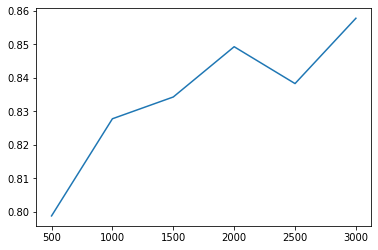

In [430]:
mlp_active_dist_to_boundary(x,y,500,500,4000)

Ok, let's do a comparison of each method, and see how quickly each of these methods can get us up to 95% accuracy and plot everything on one graph.

First the random sampling method:

In [447]:
mnist = pd.read_csv('mnist_train.csv')
mnist.rename({'5':'label'},axis=1,inplace=True)
y = mnist['label']
x = mnist.drop('label', axis=1)

Final samples : 17500
Final accuracy : 0.95875


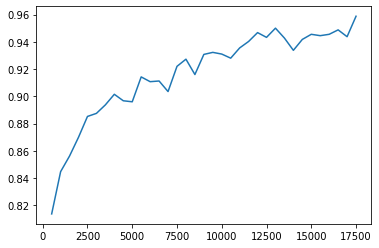

In [448]:
sample_count_random, accuracies_random = mlp_active_random(x,y,500,500,4000)

Final samples : 8500
Final accuracy : 0.95325


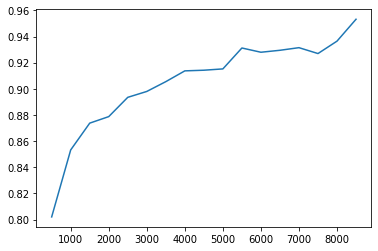

In [449]:
mnist = pd.read_csv('mnist_train.csv')
mnist.rename({'5':'label'},axis=1,inplace=True)
y = mnist['label']
x = mnist.drop('label', axis=1)
sample_count_prob, accuracies_prob = mlp_active_probability(x,y,500,500,4000)

sample 1, accuracy 0.84175 -- time : 166.278254032135
sample 2, accuracy 0.856 -- time : 179.55185317993164
sample 3, accuracy 0.84925 -- time : 179.9818139076233
sample 4, accuracy 0.86 -- time : 166.52199792861938
sample 5, accuracy 0.86475 -- time : 171.5807399749756
sample 6, accuracy 0.86575 -- time : 174.6423020362854
sample 7, accuracy 0.87025 -- time : 185.4158751964569
sample 8, accuracy 0.86 -- time : 175.28069305419922
sample 9, accuracy 0.86525 -- time : 187.10796093940735
sample 10, accuracy 0.8505 -- time : 181.2121081352234
sample 11, accuracy 0.87575 -- time : 183.40588283538818
sample 12, accuracy 0.889 -- time : 186.1773030757904
sample 13, accuracy 0.902 -- time : 186.12769198417664
sample 14, accuracy 0.90275 -- time : 177.45725011825562
sample 15, accuracy 0.893 -- time : 182.47708082199097
sample 16, accuracy 0.92025 -- time : 191.29931902885437
sample 17, accuracy 0.915 -- time : 186.53527283668518
sample 18, accuracy 0.91 -- time : 181.8908429145813
sample 19, a

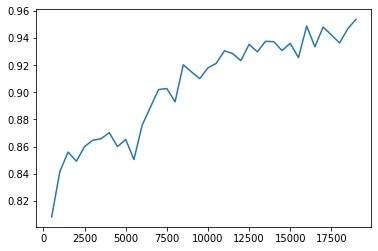

In [458]:
mnist = pd.read_csv('mnist_train.csv')
mnist.rename({'5':'label'},axis=1,inplace=True)
y = mnist['label']
x = mnist.drop('label', axis=1)
sample_count_dist, accuracies_dist = mlp_active_dist_to_boundary(x,y,500,500,4000)

This strategy did not work... even worse than the random sample!

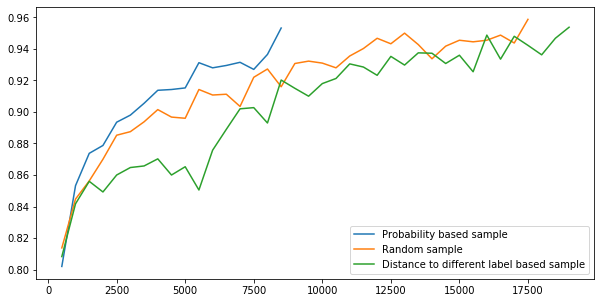

In [462]:
plt.figure(figsize=(10,5))
plt.plot(sample_count_prob, accuracies_prob,label='Probability based sample')
plt.plot(sample_count_random, accuracies_random,label='Random sample')
plt.plot(sample_count_dist, accuracies_dist,label='Distance to different label based sample')
plt.legend()

I'm going to tweek everything slightly to take in the hidden layer input values, that way I can I use these on other datasets with models that are better suited to them.

In [13]:
def generic_active_random(X,y,n_start,n_step,n_test,hidden_layers,target_accuracy):
    X_test,y_test,X,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers)
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    searching = True
    
    while searching == True:
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layers,warm_start=True)
        X_temp, y_temp, X, y = sample_df_updates(X,y,n_step)
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        if accuracy > target_accuracy:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)
    return sample_count_list, accuracies

def generic_active_probability(X,y,n_start,n_step,n_test,hidden_layers,target_accuracy):
    X_test,y_test,X,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers)
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    
    searching = True
    
    while searching == True:
        X_temp, y_temp, X, y = sample_from_uncertain(X,y,n_step,mlp)
        
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layers,warm_start=True)
        
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        if accuracy > target_accuracy:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)
    return sample_count_list, accuracies

def mlp_active_dist_to_boundary(X,y,n_start,n_step,n_test,hidden_layers,target_accuracy):
    X_test,y_test,X,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers)
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    
    searching = True
    sample_n = 1
    while searching == True:
        
        start_time = time.time()
        
        X_temp, y_temp, X, y = sample_from_dist_to_boundary(X,y,n_step,mlp)
        
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layers,warm_start=True)
        
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        print(f'sample {sample_n}, accuracy {accuracy} -- time : {time.time()-start_time}')
        sample_n +=1
        if accuracy >target_accuracy:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)
    return sample_count_list, accuracies

Let's also wrap everything up into one master function which will perform the whole analysis for start to finish

In [14]:
def generic_active_master(data_function,n_start,n_step,n_test,hidden_layers,target_accuracy):
    X, y = data_function
    random_n, random_acc = generic_active_random(X,y,n_start,n_step,n_test,hidden_layers,target_accuracy)
    
    X_2, y_2 = data_function
    prob_n, prob_acc = generic_active_probability(X_2,y_2,n_start,n_step,n_test,hidden_layers,target_accuracy)
    
    X_3, y_3 = data_function
    dist_n, dist_acc = mlp_active_dist_to_boundary(X_3,y_3,n_start,n_step,n_test,hidden_layers,target_accuracy)
    
    plt.figure(figsize=(10,5))
    plt.plot(random_n, random_acc,label='Random sample')
    plt.plot(prob_n, prob_acc,label='Probability based sample')
    plt.plot(dist_n, dist_acc,label='Distance to different label based sample')
    plt.legend()

Ok, now let's try it on a few other data sets, see what we get.

In [34]:
mushroom = pd.read_csv('agaricus-lepiota.csv')
mushroom.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [48]:
def mushroom_function():
    df = pd.read_csv('agaricus-lepiota.csv')
    y = pd.get_dummies(df['p'],drop_first=True)
    df.drop('p',axis=1,inplace=True)
    X = pd.DataFrame()
    for column in df.columns:
        X = pd.concat([X,pd.get_dummies(df[column],drop_first=True)],axis=1)
    return X, y

In [43]:
X,y = mushroom_function()

In [53]:
len(X.columns)

95

Final samples : 650
Final accuracy : 0.997
Final samples : 450
Final accuracy : 0.998
sample 1, accuracy 0.987 -- time : 4.373510122299194
sample 2, accuracy 0.996 -- time : 4.269586801528931
Final samples : 150
Final accuracy : 0.996


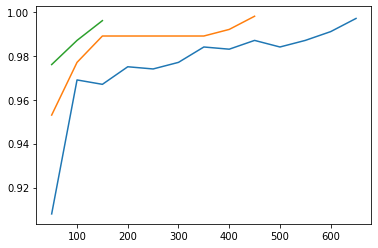

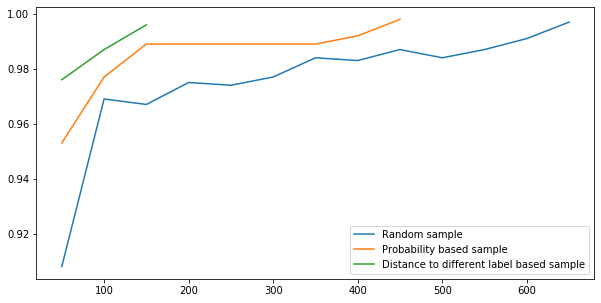

In [57]:
generic_active_master(mushroom_function(),50,50,1000,(100,100),.995)

Final samples : 500
Final accuracy : 0.996
Final samples : 150
Final accuracy : 0.996
sample 1, accuracy 0.976 -- time : 6.066361904144287
sample 2, accuracy 0.984 -- time : 5.399522066116333
sample 3, accuracy 0.989 -- time : 5.063162088394165
sample 4, accuracy 0.989 -- time : 5.015722036361694
sample 5, accuracy 0.989 -- time : 4.859665155410767
sample 6, accuracy 0.989 -- time : 4.7607951164245605
sample 7, accuracy 0.995 -- time : 4.713541746139526
sample 8, accuracy 1.0 -- time : 4.637998104095459
Final samples : 450
Final accuracy : 1.0


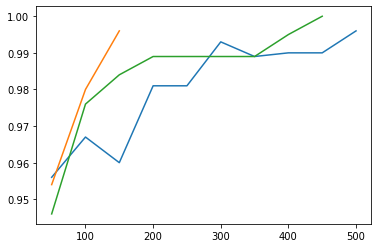

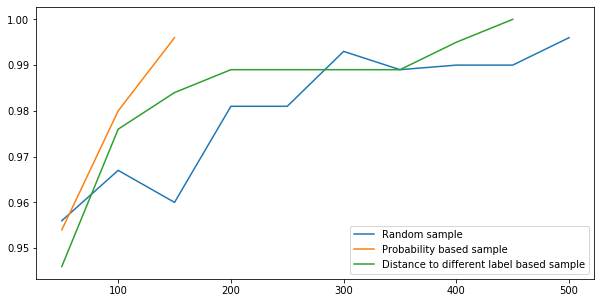

In [58]:
generic_active_master(mushroom_function(),50,50,1000,(100,100),.995)

In [65]:
fashion = pd.read_csv('fashion-mnist_train.csv')

In [68]:
fashion_y = fashion['label']
fashion_X = fashion.drop('label',axis=1)
mlp = MLPClassifier(hidden_layer_sizes=(300,300))
mlp.fit(fashion_X, fashion_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [69]:
fashion_test = pd.read_csv('fashion-mnist_test.csv')
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
fashion_pred = mlp.predict(fashion_test.drop('label',axis=1))
accuracy_score(fashion_test['label'],fashion_pred)

0.8799

In [71]:
def fashion_data():
    fashion = pd.read_csv('fashion-mnist_train.csv')
    fashion_y = fashion['label']
    fashion_X = fashion.drop('label',axis=1)
    return fashion_X, fashion_y

Final samples : 15000
Final accuracy : 0.851
Final samples : 8500
Final accuracy : 0.8508
sample 1, accuracy 0.8646 -- time : 191.15483593940735
Final samples : 1500
Final accuracy : 0.8646


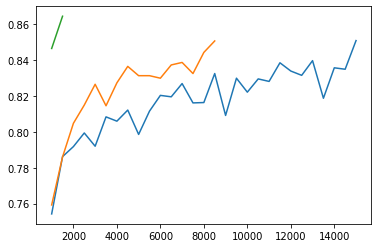

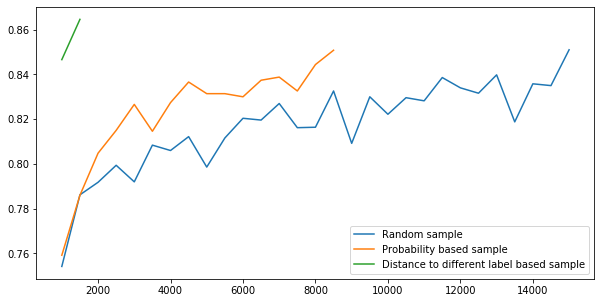

In [73]:
generic_active_master(fashion_data(),1000,500,5000,(300,300),.85)

Final samples : 20000
Final accuracy : 0.8662
Final samples : 9500
Final accuracy : 0.8542
sample 1, accuracy 0.8566 -- time : 176.919921875
Final samples : 1500
Final accuracy : 0.8566


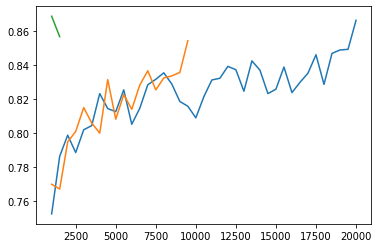

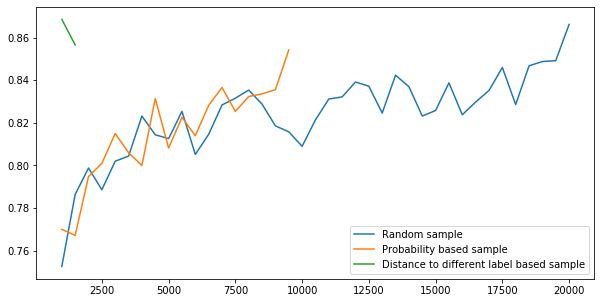

In [74]:
generic_active_master(fashion_data(),1000,500,5000,(300,300),.85)

Final samples : 17000
Final accuracy : 0.8514
Final samples : 14000
Final accuracy : 0.8516


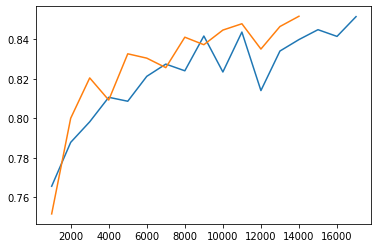

In [77]:
X, y = fashion_data()
random_n, random_acc = generic_active_random(X,y,1000,1000,5000,(300,300),.85)

X, y = fashion_data()
prob_n, prob_acc = generic_active_probability(X,y,1000,1000,5000,(300,300),.85)

sample 1, accuracy 0.8112 -- time : 160.39584112167358
sample 2, accuracy 0.8114 -- time : 167.35133576393127
sample 3, accuracy 0.7994 -- time : 171.46419310569763
sample 4, accuracy 0.8036 -- time : 181.38870096206665
sample 5, accuracy 0.8076 -- time : 178.68140292167664
sample 6, accuracy 0.8006 -- time : 175.11540913581848
sample 7, accuracy 0.7974 -- time : 177.59305429458618
sample 8, accuracy 0.7998 -- time : 173.02823400497437
sample 9, accuracy 0.8364 -- time : 180.49291801452637
sample 10, accuracy 0.8126 -- time : 175.40030789375305
sample 11, accuracy 0.8302 -- time : 179.68219995498657
sample 12, accuracy 0.8252 -- time : 181.44023990631104
sample 13, accuracy 0.8256 -- time : 188.2652497291565
sample 14, accuracy 0.8306 -- time : 185.65145707130432
sample 15, accuracy 0.8406 -- time : 190.39692401885986
sample 16, accuracy 0.8346 -- time : 182.55904626846313
sample 17, accuracy 0.8402 -- time : 189.67740607261658
sample 18, accuracy 0.8416 -- time : 197.4604790210724
sam

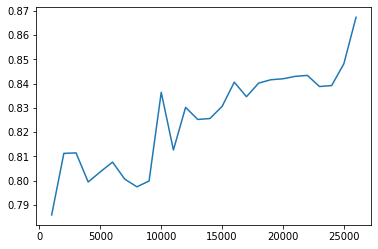

In [78]:
X, y = fashion_data()
dist_n, dist_acc = mlp_active_dist_to_boundary(X,y,1000,1000,5000,(300,300),.85)

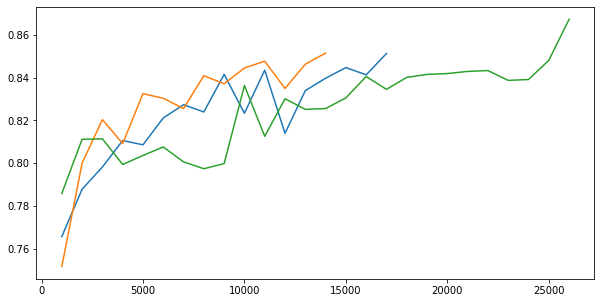

In [79]:
plt.figure(figsize=(10,5))
plt.plot(random_n, random_acc)
plt.plot(prob_n, prob_acc)
plt.plot(dist_n, dist_acc)

sample 1, accuracy 0.7844 -- time : 162.55672979354858
sample 2, accuracy 0.7854 -- time : 166.79222178459167
sample 3, accuracy 0.798 -- time : 180.3787751197815
sample 4, accuracy 0.8134 -- time : 165.76738595962524
sample 5, accuracy 0.8132 -- time : 169.84284687042236
sample 6, accuracy 0.8168 -- time : 179.30835390090942
sample 7, accuracy 0.819 -- time : 177.962464094162
sample 8, accuracy 0.8268 -- time : 184.382061958313
sample 9, accuracy 0.82 -- time : 181.53663206100464
sample 10, accuracy 0.834 -- time : 187.44202399253845
sample 11, accuracy 0.822 -- time : 191.64852690696716
sample 12, accuracy 0.8228 -- time : 197.23832297325134
sample 13, accuracy 0.8404 -- time : 187.3506419658661
sample 14, accuracy 0.826 -- time : 189.08242988586426
sample 15, accuracy 0.8262 -- time : 191.650484085083
sample 16, accuracy 0.8522 -- time : 211.61926984786987
Final samples : 17000
Final accuracy : 0.8522


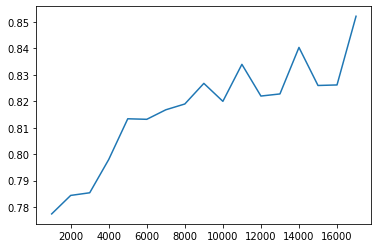

In [80]:
X, y = fashion_data()
dist_n, dist_acc = mlp_active_dist_to_boundary(X,y,1000,1000,5000,(300,300),.85)

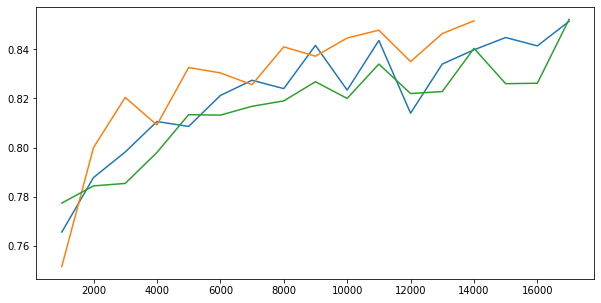

In [81]:
plt.figure(figsize=(10,5))
plt.plot(random_n, random_acc, label='Random sample')
plt.plot(prob_n, prob_acc, label='Probability based sample')
plt.plot(dist_n, dist_acc,'Distance to different label point based sample')
plt.legend()